### Load modules

In [ ]:
from autotsforecastML import AutoUnivariateiTS
import pandas as pd
import numpy as np

### Generate random dataset for testing

In [ ]:
# Just to give an example, creating a randomly generated values in pandas dataframe object
time = pd.date_range(start='1/1/2018', end='1/08/2019')
data = pd.DataFrame({
    'time': time,
    'value1': np.random.randint(1,100, len(time)),
    'value2':np.random.randint(1,100, len(time)),
    'value3':np.random.randint(1,100, len(time)),
    'value4':np.random.randint(1,100, len(time)),
    'value5':np.random.randint(1,100, len(time)),
}).set_index('time')

# show first 5 rows of generated data
data.head()

,value1,value2,value3,value4,value5
time,,,,,
2018-01-01,1,31,13,23,49
2018-01-02,23,67,78,28,72
2018-01-03,55,90,99,36,69
2018-01-04,71,49,92,37,24
2018-01-05,63,24,63,10,16


### Use Autoforecasting - Train and Validation set

In [ ]:
# Load autounivariate time series class
a = AutoUnivariateiTS()

# convert pandas dataframe object into timeseries obbject
s = a.pandasdf_to_timeriesdata(data, target_column=['value5'])

# prepare training and validation dataset
train, val = a.train_test_split_data(s, spliting_at = 0.7, plot = False,plot_size=(15,5))

### Fit and Predict different models

In [ ]:
# use fit_predict methode to fit the models and generate predictions
preds = a.fit_predict(train, val, select_all_models=True)

Is provided data seasonal? :True
There is seasonality of order 4


  0%|          | 0/6 [00:00<?, ?it/s]


=======================AUTO ARIMA - MDOEL SUMMARY=======================

Model parameters: Auto-ARIMA
Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,1,0)[4] intercept   : BIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : BIC=2611.907, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : BIC=2556.780, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[4]             : BIC=2606.362, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : BIC=2614.481, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : BIC=2527.310, Time=1.28 sec
 ARIMA(1,0,0)(3,1,0)[4] intercept   : BIC=2520.895, Time=1.83 sec
 ARIMA(1,0,0)(3,1,1)[4] intercept   : BIC=inf, Time=6.04 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : BIC=inf, Time=2.56 sec
 ARIMA(0,0,0)(3,1,0)[4] intercept   : BIC=2515.767, Time=2.71 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : BIC=2523.235, Time=0.65 sec
 ARIMA(0,0,0)(3,1,1)[4] intercept   : BIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(2,1,1)

### Summary Metrics

In [ ]:
# show summary metrics
preds

,MAE,MAPE,R squared,RMSE,RMSLE,time
auto arima,28.263,217.485,0.531,33.714,0.940,24.886
exponential smoothing,24.435,185.344,0.076,28.264,0.886,0.210
theta,35.045,90.102,1.441,42.570,1.211,0.094
naive drift,35.172,241.876,1.447,42.624,1.095,0.071
prophet (additive seasonality),23.946,183.934,0.050,27.918,0.878,0.347
prophet (multiplicative seasonality),23.804,183.484,0.046,27.872,0.876,0.295


### Predictions

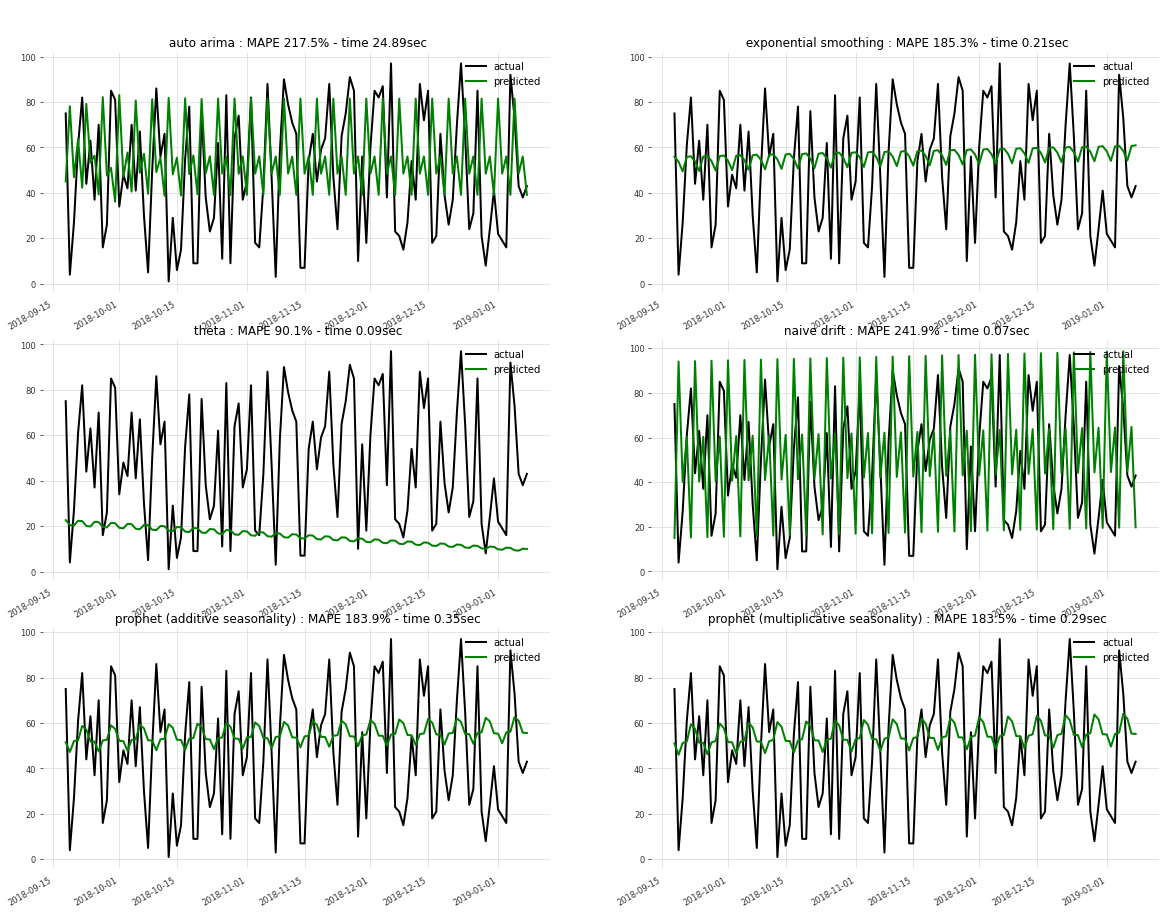

In [ ]:
# plot predicted values for akk the models
a.plot_fit_predict()

### Residual analysis

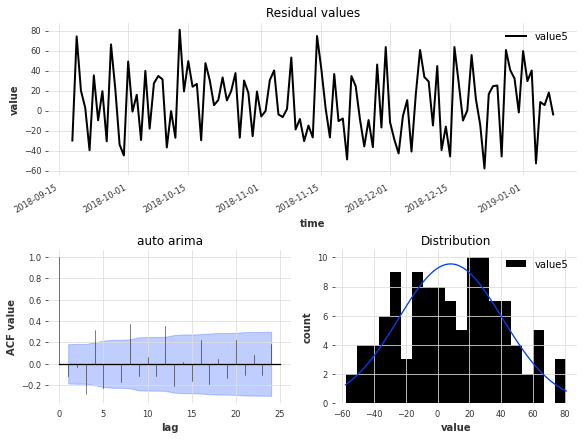

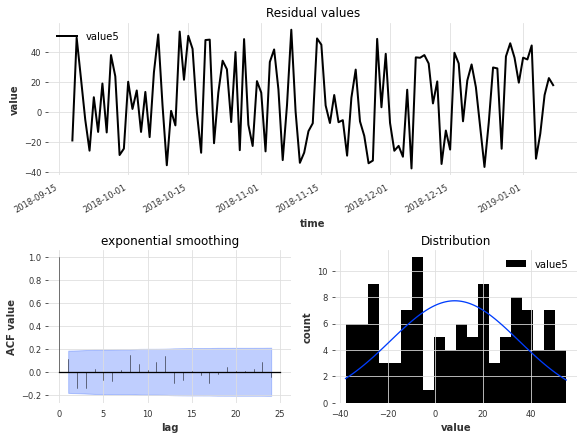

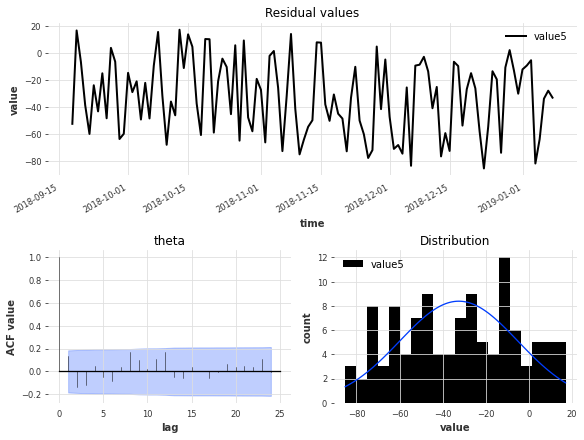

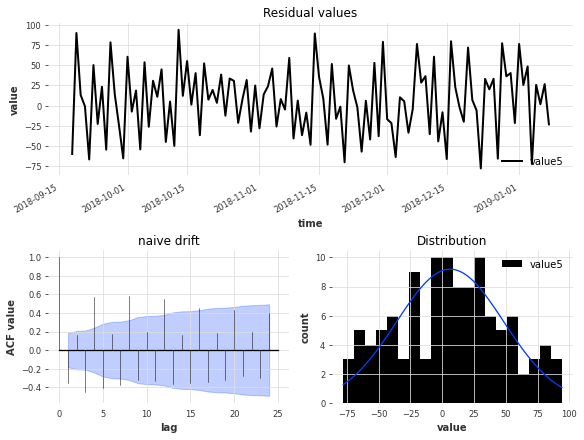

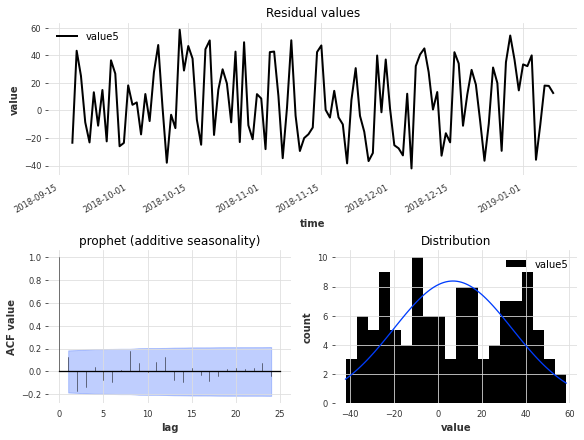

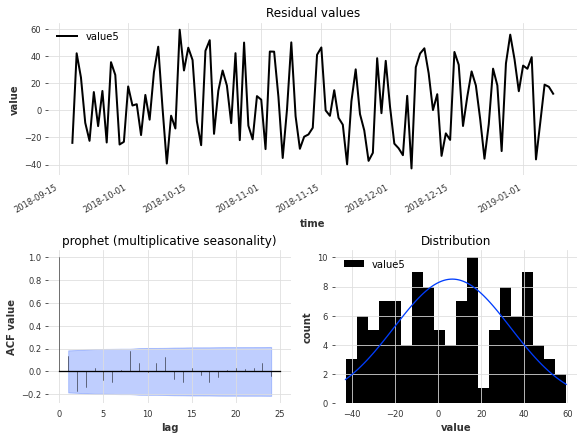

In [ ]:
# plot error analysis for each model to understand the underlying distributions
a.plot_residual_diagnostics()

In [ ]:
a.